# Oversampling
To address performance issues with specific underperforming classes identified during training, I performed oversampling to those calsses. This has been curated to enhance the model's accuracy and effectiveness.

## Imports and definitions

In [ ]:
from google.colab import drive
from PIL import Image, ImageOps
import shutil
import random
import os

%matplotlib inline

In [ ]:
drive.mount('/content/drive')
BASE_PATH = '/content/drive/MyDrive/Plant Recognition/Model/'

# Define paths for train and valid
TRAIN_IMAGES_PATH = os.path.join(BASE_PATH, 'dataset/images/train')
VAL_IMAGES_PATH = os.path.join(BASE_PATH, 'dataset/images/val')
TRAIN_LABELS_PATH = os.path.join(BASE_PATH, 'dataset/labels/train')
VAL_LABELS_PATH = os.path.join(BASE_PATH, 'dataset/labels/val')

Mounted at /content/drive


### The underperforming classes

* **Peace Lily**: The white flowers and simple shape make it harder for the model to distinguish against bright or plain backgrounds.

* **African Violet**: The complex shape of the flowers and overlapping leaves make it challenging for the model to identify.

* **Orchid**: The flower patterns and varying petal shapes are harder for the model to differentiate.

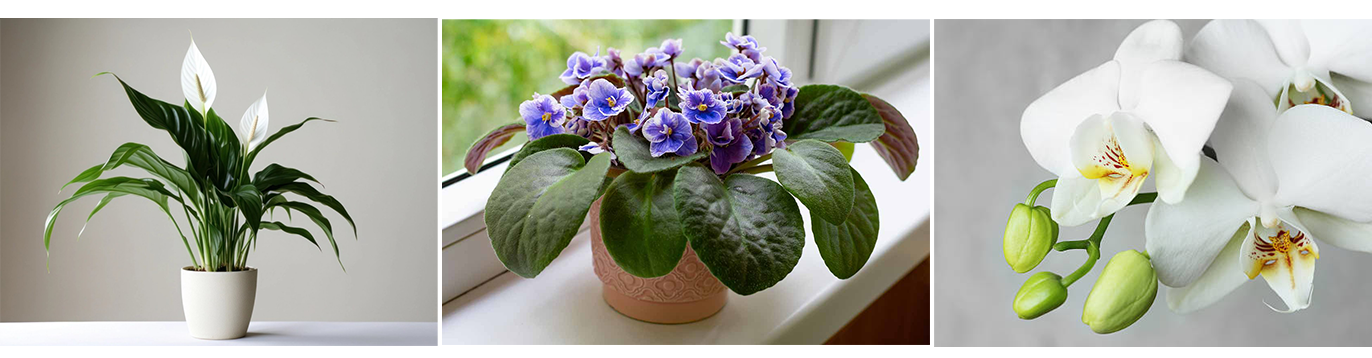

### Oversampling our weak classes

In [ ]:
# Define the target class prefixes
TARGET_PREFIXES = ["3_", "4_", "9_"]

In [ ]:
# Function to oversample and duplicate images/labels without augmentation
def oversample(images_path, labels_path, max_oversamples=70):
    oversample_counts = {prefix: 0 for prefix in TARGET_PREFIXES}  # Counter for each class

    for label_file in os.listdir(labels_path):
        if label_file.endswith(".txt"):
            base_name = os.path.splitext(label_file)[0]

            for prefix in TARGET_PREFIXES:
                if base_name.startswith(prefix):
                    if oversample_counts[prefix] >= max_oversamples:
                        break  # Skip if the class limit is reached

                    original_label_path = os.path.join(labels_path, label_file)

                    # Find the corresponding image file (any extension)
                    original_image_path = None
                    for file in os.listdir(images_path):
                        if file.startswith(base_name) and not file.endswith(".txt"):
                            original_image_path = os.path.join(images_path, file)
                            break

                    # Skip if no corresponding image is found
                    if not original_image_path:
                        continue

                    # Save duplicated image with new name
                    image_extension = os.path.splitext(original_image_path)[1]
                    new_image_name = f"oversample_{base_name}{image_extension}"
                    new_image_path = os.path.join(images_path, new_image_name)
                    shutil.copy(original_image_path, new_image_path)

                    # Save duplicated label file with new name
                    new_label_name = f"oversample_{base_name}.txt"
                    new_label_path = os.path.join(labels_path, new_label_name)
                    shutil.copy(original_label_path, new_label_path)

                    print(f"Duplicated {original_image_path} -> {new_image_path}")
                    print(f"Duplicated {original_label_path} -> {new_label_path}")

                    oversample_counts[prefix] += 1

                    # Break once the limit is reached
                    if oversample_counts[prefix] >= max_oversamples:
                        break

In [ ]:
# Oversample train and validation datasets
oversample(TRAIN_IMAGES_PATH, TRAIN_LABELS_PATH)
oversample(VAL_IMAGES_PATH, VAL_LABELS_PATH, max_oversamples=20)

print("Oversampling with augmentation complete.")

Duplicated /content/drive/MyDrive/Studying/Computer Science - Final Project/Model/dataset/images/train/4_95.jpg -> /content/drive/MyDrive/Studying/Computer Science - Final Project/Model/dataset/images/train/oversample_4_95.jpg
Duplicated /content/drive/MyDrive/Studying/Computer Science - Final Project/Model/dataset/labels/train/4_95.txt -> /content/drive/MyDrive/Studying/Computer Science - Final Project/Model/dataset/labels/train/oversample_4_95.txt
Duplicated /content/drive/MyDrive/Studying/Computer Science - Final Project/Model/dataset/images/train/9_70.jpg -> /content/drive/MyDrive/Studying/Computer Science - Final Project/Model/dataset/images/train/oversample_9_70.jpg
Duplicated /content/drive/MyDrive/Studying/Computer Science - Final Project/Model/dataset/labels/train/9_70.txt -> /content/drive/MyDrive/Studying/Computer Science - Final Project/Model/dataset/labels/train/oversample_9_70.txt
Duplicated /content/drive/MyDrive/Studying/Computer Science - Final Project/Model/dataset/im

**Validation of the oversampling process**

In [ ]:
# Function to count oversampled files
def count_oversample_files(images_path, labels_path):
    image_count = 0
    label_count = 0

    # Count oversampled images
    for file in os.listdir(images_path):
        if file.startswith("oversample_"):
            image_count += 1

    # Count oversampled labels
    for file in os.listdir(labels_path):
        if file.startswith("oversample_"):
            label_count += 1

    return image_count, label_count

In [ ]:
# Count oversample files for train and val
train_image_count, train_label_count = count_oversample_files(TRAIN_IMAGES_PATH, TRAIN_LABELS_PATH)
val_image_count, val_label_count = count_oversample_files(VAL_IMAGES_PATH, VAL_LABELS_PATH)

# Print results
print("Train Oversample Files:")
print(f"Images: {train_image_count}, Labels: {train_label_count}")

print("Validation Oversample Files:")
print(f"Images: {val_image_count}, Labels: {val_label_count}")

Train Oversample Files:
Images: 210, Labels: 210
Validation Oversample Files:
Images: 60, Labels: 60
